<a href="https://colab.research.google.com/github/Davron030901/Reinforcement-Learning/blob/main/QLearningAgent_of_maze_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**[Can Machine Learning Solve a Maze?](https://www.sciencebuddies.org/science-fair-projects/project-ideas/ArtificialIntelligence_p008/artificial-intelligence/machine-learning-maze)**

This notebook was developed by Science Buddies [www.sciencebuddies.org](https://www.sciencebuddies.org/) as part of a science project to allow students to explore and learn about artificial intelligence. For personal use, this notebook can be downloaded and modified with attribution. For all other uses, please see our [Terms and Conditions of Fair Use](https://www.sciencebuddies.org/about/terms-and-conditions-of-fair-use).  

**Troubleshooting tips**
*   Read the written instructions at Science Buddies and the text and comments on this page carefully.
*   If you make changes that break the code, you can download a fresh copy of this notebook and start over.

*   If you are using this notebook for a science project and need help, visit our [Ask an Expert](https://www.sciencebuddies.org/science-fair-projects/ask-an-expert-intro) forum for assistance.





## **How To Use This Notebook**

This notebook contains text fields, like this one, that give you information about the project and instructions.

In [1]:
# There are also code blocks, like this one.

# The green text in a code block are comments. Comments are descriptions of what the code does.

# The non-green text in a code block is the Python code. Click on the triangle in the top left corner to run this code block.

print("Congratulations, you ran a code block! Try changing the text in the code and running it again.")

Congratulations, you ran a code block! Try changing the text in the code and running it again.


##**Importing Libraries**
We will start this science project by importing some necessary libraries. These libraries contain functions that we will be using to create and display our maze. The comments tell you what each libary is for.

In [2]:
# Provides support for large, multi-dimensional arrays and matrices, as well as a wide range of mathematical functions
# We will be using this library to initialize our maze.
import numpy as np

# A 2D plotting library that enables users to create a wide variety of high-quality plots and visualizations.
# We will be using this library to display our maze in a visually appealing way.
import matplotlib.pyplot as plt

# A library that provides various functions for working with time-related operations. We will be using this library
# to give us time to look at how the agent is progressing through the maze
import time

print("You have imported all the libraries.")

You have imported all the libraries.


##**Creating the Maze Environment**

The code below sets up a simple maze with walls, a starting point (S), and a goal point (G). The maze is set up on a grid where each cell is either a 0 or 1, with 0 representing a black empty space and 1 representing a white wall. For your science project, you can use the sample maze we have provided, or change the code to make your own.

If you make your own maze follow these guidelines:
*   You can make it any size you want.
*   Make sure that the start and goal positions are located inside the maze and not on a wall.
*   Make sure your maze has a path from the start to the goal.


In [3]:
class Maze:
    def __init__(self, maze, start_position, goal_position):
        # Initialize Maze object with the provided maze, start_position, and goal position
        self.maze = maze
        self.maze_height = maze_layout.shape[0] # Get the height of the maze (number of rows)
        self.maze_width = maze_layout.shape[1]  # Get the width of the maze (number of columns)
        self.start_position = start_position    # Set the start position in the maze as a tuple (x, y)
        self.goal_position = goal_position      # Set the goal position in the maze as a tuple (x, y)

    def show_maze(self):
        # Visualize the maze using Matplotlib
        plt.figure(figsize=(5,5))

        # Display the maze as an image in grayscale ('gray' colormap)
        plt.imshow(self.maze, cmap='gray')

        # Add start and goal positions as 'S' and 'G'
        plt.text(self.start_position[0], self.start_position[1], 'S', ha='center', va='center', color='red', fontsize=20)
        plt.text(self.goal_position[0], self.goal_position[1], 'G', ha='center', va='center', color='blue', fontsize=20)

        # Remove ticks and labels from the axes
        plt.xticks([]), plt.yticks([])

        # Show the plot
        plt.show()

print("This code block has been run and the Maze class is now available for use.")

This code block has been run and the Maze class is now available for use.


In [4]:
# prompt: generate more difficult maze combinations

import numpy as np
import matplotlib.pyplot as plt
import time
import random

# ... (rest of your code, including the Maze class) ...

def generate_random_maze(width, height, complexity=.75, density=.75):
    """Generates a random maze using a recursive backtracker algorithm.

    Args:
        width: Width of the maze.
        height: Height of the maze.
        complexity: A float between 0 and 1 representing the complexity of the maze.
        density: A float between 0 and 1 representing the density of the maze.

    Returns:
        A numpy array representing the maze layout.
    """
    shape = ((height // 2) * 2 + 1, (width // 2) * 2 + 1)
    # Adjust complexity and density relative to maze size
    complexity = int(complexity * (5 * (shape[0] + shape[1])))
    density = int(density * ((shape[0] // 2) * (shape[1] // 2)))
    # Build actual maze
    Z = np.ones(shape, dtype=bool)
    # Fill borders
    Z[0, :] = Z[-1, :] = 1
    Z[:, 0] = Z[:, -1] = 1
    # Make isles
    for i in range(density):
        x, y = random.randint(0, shape[1] // 2) * 2, random.randint(0, shape[0] // 2) * 2
        Z[y, x] = 0
        for j in range(complexity):
            neighbours = []
            if x > 1: neighbours.append((y, x - 2))
            if x < shape[1] - 2: neighbours.append((y, x + 2))
            if y > 1: neighbours.append((y - 2, x))
            if y < shape[0] - 2: neighbours.append((y + 2, x))
            if len(neighbours):
                y_, x_ = neighbours[random.randint(0, len(neighbours) - 1)]
                if Z[y_, x_] == 1:
                    Z[y_, x_] = 0
                    Z[y_ + (y - y_) // 2, x_ + (x - x_) // 2] = 0
                    x, y = x_, y_
    return Z


# Example usage:
maze_width = 30  # Adjust width
maze_height = 30  # Adjust height
maze_layout = generate_random_maze(maze_width, maze_height)

# ... (rest of your code, including creating the Maze instance and displaying it) ...


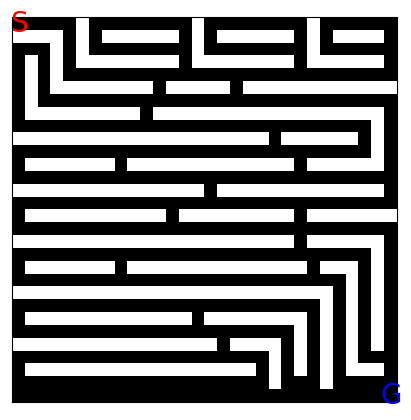

In [5]:
# Create any maze layout you'd like, here's an example
# maze_layout = np.array([
#     [0, 1, 0, 0, 0],
#     [0, 1, 1, 1, 0],
#     [0, 0, 1, 0, 0],
#     [1, 0, 1, 0, 1],
#     [0, 0, 0, 0, 0]
# ])

maze_layout = np.array([
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])
# maze_layout[0] = 0
# # Create an instance of the maze and set the starting and ending positions
maze = Maze(maze_layout, (0,0), (29, 29))
# Visualize the maze
maze.show_maze()

##**Implementing the Agent**

The code below is for the agent. The agent can move in four directions: up, down, left, and right. You do not need to change this code for your engineering project. As a variation to the project, you can (with a little bit of python knowledge) try making changes to the learning and exploration rate work as a variation to the project.

In [6]:
# Actions the agent can take: Up, Down, Left, Right. Each action is represented as a tuple of two values: (row_change, column_change)
actions = [(-1, 0), # Up: Moving one step up, reducing the row index by 1
          (1, 0),   # Down: Moving on step down, increasing the row index by 1
          (0, -1),  # Left: Moving one step to the left, reducing the column index by 1
          (0, 1)]   # Right: Moving one step to the right, increasing the column index by 1

class QLearningAgent:
    def __init__(self, maze, learning_rate=0.1, discount_factor=0.9, exploration_start=1.0, exploration_end=0.01, num_episodes=100):
        # Initialize the Q-learning agent with a Q-table containing all zeros
        # where the rows represent states, columns represent actions, and the third dimension is for each action (Up, Down, Left, Right)
        self.q_table = np.zeros((maze.maze_height, maze.maze_width, 4)) # 4 actions: Up, Down, Left, Right
        self.learning_rate = learning_rate          # Learning rate controls how much the agent updates its Q-values after each action
        self.discount_factor = discount_factor      # Discount factor determines the importance of future rewards in the agent's decisions
        self.exploration_start = exploration_start  # Exploration rate determines the likelihood of the agent taking a random action
        self.exploration_end = exploration_end
        self.num_episodes = num_episodes

    def get_exploration_rate(self, current_episode):
        # Calculate the current exploration rate using the given formula
        exploration_rate = self.exploration_start * (self.exploration_end / self.exploration_start) ** (current_episode / self.num_episodes)
        return exploration_rate

    def get_action(self, state, current_episode): # State is tuple representing where agent is in maze (x, y)
        exploration_rate = self.get_exploration_rate(current_episode)
        # Select an action for the given state either randomly (exploration) or using the Q-table (exploitation)
        if np.random.rand() < exploration_rate:
            return np.random.randint(4) # Choose a random action (index 0 to 3, representing Up, Down, Left, Right)
        else:
            return np.argmax(self.q_table[state]) # Choose the action with the highest Q-value for the given state

    def update_q_table(self, state, action, next_state, reward):
        # Find the best next action by selecting the action that maximizes the Q-value for the next state
        best_next_action = np.argmax(self.q_table[next_state])

        # Get the current Q-value for the current state and action
        current_q_value = self.q_table[state][action]

        # Q-value update using Q-learning formula
        new_q_value = current_q_value + self.learning_rate * (reward + self.discount_factor * self.q_table[next_state][best_next_action] - current_q_value)

        # Update the Q-table with the new Q-value for the current state and action
        self.q_table[state][action] = new_q_value

print("This code block has been run and the QLearningAgent class is now available for use.")

This code block has been run and the QLearningAgent class is now available for use.


##**Exploitation Function Implementation**

In [7]:
def exploit_agent(agent, maze, num_episodes=10):
    """
    Tests the agent's performance using pure exploitation (no random actions).
    This function evaluates how well the agent has learned by using only
    the best actions according to its Q-table.

    Parameters:
    - agent: The trained QLearningAgent
    - maze: The Maze environment
    - num_episodes: Number of episodes to run (default=10)

    Returns:
    - Average number of steps across episodes
    - Average total reward across episodes
    """
    total_steps = 0
    total_rewards = 0
    successful_episodes = 0

    for episode in range(num_episodes):
        current_state = maze.start_position
        is_done = False
        episode_reward = 0
        episode_step = 0
        path = [current_state]

        # Track visited states to detect loops
        visited_states = set()
        visited_states.add(current_state)
        in_loop = False

        # Continue until the episode is done
        while not is_done:
            # Get Q-values for the current state
            q_values = agent.q_table[current_state]

            # Print the Q-values for debugging
            if episode_step == 0:
                print(f"\nEpisode {episode+1}:")
                print(f"Starting at position {current_state}")
                print(f"Q-values at start: {q_values}")
                print(f"Actions represent: [Up, Down, Left, Right]")

            # Always choose the best action (pure exploitation)
            action = np.argmax(q_values)

            # Map action to direction for readability
            direction = ["Up", "Down", "Left", "Right"][action]

            # Compute the next state based on the chosen action
            next_state = (current_state[0] + actions[action][0], current_state[1] + actions[action][1])

            # Check if the next state is out of bounds or hitting a wall
            if (next_state[0] < 0 or next_state[0] >= maze.maze_height or
                next_state[1] < 0 or next_state[1] >= maze.maze_width or
                maze.maze[next_state[1]][next_state[0]] == 1):
                print(f"  Step {episode_step+1}: Tried to move {direction} but hit wall/boundary")
                reward = wall_penalty
                next_state = current_state
            # Check if the agent reached the goal
            elif next_state == maze.goal_position:
                path.append(next_state)
                reward = goal_reward
                is_done = True
                successful_episodes += 1
                print(f"  Step {episode_step+1}: Moved {direction} to {next_state} and reached the goal!")
            # The agent takes a step but hasn't reached the goal yet
            else:
                print(f"  Step {episode_step+1}: Moved {direction} to {next_state}")
                path.append(next_state)
                reward = step_penalty

                # Check if we're entering a loop
                if next_state in visited_states:
                    print(f"  Warning: Agent is revisiting state {next_state} - possible loop detected")
                    in_loop = True

                visited_states.add(next_state)

            # Update the cumulative reward and step count for the episode
            episode_reward += reward
            episode_step += 1

            # Move to the next state for the next iteration
            current_state = next_state

            # Safety check - prevent infinite loops
            if episode_step > 100 or in_loop:
                if in_loop:
                    print(f"  Terminating episode: Loop detected")
                else:
                    print(f"  Terminating episode: Exceeded 100 steps")
                break

        # Episode summary
        if is_done:
            print(f"Episode {episode+1} completed successfully in {episode_step} steps with reward {episode_reward}")
        else:
            print(f"Episode {episode+1} failed to reach goal after {episode_step} steps with reward {episode_reward}")

        total_steps += episode_step
        total_rewards += episode_reward

        # Visualize the final path (only for the last episode)
        if episode == num_episodes - 1:
            plt.figure(figsize=(5,5))
            plt.imshow(maze.maze, cmap='gray')

            # Mark the start position (red 'S') and goal position (green 'G') in the maze
            plt.text(maze.start_position[0], maze.start_position[1], 'S', ha='center', va='center', color='red', fontsize=20)
            plt.text(maze.goal_position[0], maze.goal_position[1], 'G', ha='center', va='center', color='green', fontsize=20)

            # Mark the agent's path with blue '#' symbols
            for position in path:
                plt.text(position[0], position[1], "#", ha='center', va='center', color='blue', fontsize=20)

            # Remove axis ticks and grid lines for a cleaner visualization
            plt.xticks([]), plt.yticks([])
            plt.grid(color='black', linewidth=2)
            plt.title("Pure Exploitation Path")
            plt.show()

    avg_steps = total_steps / num_episodes
    avg_rewards = total_rewards / num_episodes
    success_rate = (successful_episodes / num_episodes) * 100

    # print(f"\nExploitation Results:")
    # print(f"Success rate: {success_rate:.2f}%")
    # print(f"Average steps: {avg_steps:.2f}")
    # print(f"Average reward: {avg_rewards:.2f}")

    # Analyze Q-table to understand the agent's learned policy
    print("\nAnalyzing Q-table for key positions:")
    positions_to_check = [
        maze.start_position,
        # Add a few more positions, like those adjacent to the start
        (maze.start_position[0]+1, maze.start_position[1]) if maze.start_position[0]+1 < maze.maze_height else maze.start_position,
        (maze.start_position[0], maze.start_position[1]+1) if maze.start_position[1]+1 < maze.maze_width else maze.start_position
    ]

    for pos in positions_to_check:
        if pos[0] < 0 or pos[0] >= maze.maze_height or pos[1] < 0 or pos[1] >= maze.maze_width:
            continue

        q_vals = agent.q_table[pos]
        best_action = np.argmax(q_vals)
        direction = ["Up", "Down", "Left", "Right"][best_action]

        # print(f"Position {pos}:")
        # print(f"  Q-values: {q_vals}")
        # print(f"  Best action: {direction} (index {best_action})")
        # print(f"  Q-value range: {np.min(q_vals):.2f} to {np.max(q_vals):.2f}")

        # If all Q-values are zero or very close to it, highlight this
        if np.all(np.abs(q_vals) < 0.01):
            print("  ⚠️ All Q-values near zero - agent hasn't learned this state!")

    return avg_steps, avg_rewards, success_rate


##**Defining the Reward System**

This code determines the values for the reward system. The reward system provides feedback to the agent in reinforcement learning.

Use these default settings to see how the agent performs when untrained, and when initially trained.  Then adjust the values and repeat the training and evalution steps outlines in the project idea.  Keep adjusting systematically until you have engineered the best possible reward system to have the AI learn to efficiently navigate a maze.

In [8]:
goal_reward = 100
wall_penalty = -10
step_penalty = -1

agent = QLearningAgent(maze)

print("The reward system has been defined.")

The reward system has been defined.


## **Testing the Agent**

The code below tests how well the agent navigates the maze. It reports the total number of steps the agent took to get through the maze as well as the total reward the agent accumulated.

Every time you want to test the agent, run the function ten times.  Each time note the number of steps the agent used to travel between the start and the goal, as well as the total reward. Calculate the average steps and average reward across all ten test trials.

For your engineering project you will:
1. Test the agent before training.
2. Try solving the maze yourself by hand. What is the fewest number of steps you can take to solve the maze?
2. Test the agent after training with the default reward system values.
3. Make changes to the default reward system and test the agent.  You will repeat this until you have an agent who is learning very well.

In [9]:
# This function simulates the agent's movements in the maze for a single episode.

def finish_episode(agent, maze, current_episode, train=True):
    # Initialize the agent's current state to the maze's start position
    current_state = maze.start_position
    is_done = False
    episode_reward = 0
    episode_step = 0
    path = [current_state]

    # Continue until the episode is done
    while not is_done:
        # Get the agent's action for the current state using its Q-table
        action = agent.get_action(current_state, current_episode)

        # Compute the next state based on the chosen action
        next_state = (current_state[0] + actions[action][0], current_state[1] + actions[action][1])

        # Check if the next state is out of bounds or hitting a wall
        if next_state[0] < 0 or next_state[0] >= maze.maze_height or next_state[1] < 0 or next_state[1] >= maze.maze_width or maze.maze[next_state[1]][next_state[0]] == 1:
            reward = wall_penalty
            next_state = current_state
        # Check if the agent reached the goal:
        elif next_state == (maze.goal_position):
            path.append(current_state)
            reward = goal_reward
            is_done = True
        # The agent takes a step but hasn't reached the goal yet
        else:
            path.append(current_state)
            reward = step_penalty

        # Update the cumulative reward and step count for the episode
        episode_reward += reward
        episode_step += 1

        # Update the agent's Q-table if training is enabled
        if train == True:
            agent.update_q_table(current_state, action, next_state, reward)

        # Move to the next state for the next iteration
        current_state = next_state

    # Return the cumulative episode reward, total number of steps, and the agent's path during the simulation
    return episode_reward, episode_step, path

print("This code block has been run and the finish_episode function is now available for use.")

This code block has been run and the finish_episode function is now available for use.


In [10]:
# This function evaluates an agent's performance in the maze. The function simulates the agent's movements in the maze,
# updating its state, accumulating the rewards, and determining the end of the episode when the agent reaches the goal position.
# The agent's learned path is then printed along with the total number of steps taken and the total reward obtained during the
# simulation. The function also visualizes the maze with the agent's path marked in blue for better visualization of the
# agent's trajectory.

def test_agent(agent, maze, num_episodes=1):
    # Simulate the agent's behavior in the maze for the specified number of episodes
    episode_reward, episode_step, path = finish_episode(agent, maze, num_episodes, train=False)

    # Print the learned path of the agent
    print("Learned Path:")
    for row, col in path:
        print(f"({row}, {col})-> ", end='')
    print("Goal!")

    print("Number of steps:", episode_step)
    print("Total reward:", episode_reward)

    # Clear the existing plot if any
    if plt.gcf().get_axes():
        plt.cla()

    # Visualize the maze using matplotlib
    plt.figure(figsize=(5,5))
    plt.imshow(maze.maze, cmap='gray')

    # Mark the start position (red 'S') and goal position (green 'G') in the maze
    plt.text(maze.start_position[0], maze.start_position[1], 'S', ha='center', va='center', color='red', fontsize=20)
    plt.text(maze.goal_position[0], maze.goal_position[1], 'G', ha='center', va='center', color='green', fontsize=20)

    # Mark the agent's path with blue '#' symbols
    for position in path:
        plt.text(position[0], position[1], "#", va='center', color='blue', fontsize=20)

    # Remove axis ticks and grid lines for a cleaner visualization
    plt.xticks([]), plt.yticks([])
    plt.grid(color='black', linewidth=2)
    plt.show()

    return episode_step, episode_reward

# agent = QLearningAgent(maze)
# # Test the agent using the test_agent function
# test_agent(agent, maze)

Did you notice that the untrained agent takes *a lot* of steps? That is because the agent keeps backtracking and hitting walls. Before it has learned anything, it is blindly going through the maze, choosing its path randomly.

##**Setting Up the Reinforcement Learning Loop**

Below is the code for Q-learning, a basic reinforcement learning algorithm. This is used to train the agent. This code updates the Q-values based on the rewards it receives during exploration.  You do not need to change this code for your engineering project.

In [11]:
def train_agent(agent, maze, num_episodes=100):
    # Lists to store the data for plotting
    episode_rewards = []
    episode_steps = []

    # Loop over the specified number of episodes
    for episode in range(num_episodes):
        episode_reward, episode_step, path = finish_episode(agent, maze, episode, train=True)

        # Store the episode's cumulative reward and the number of steps taken in their respective lists
        episode_rewards.append(episode_reward)
        episode_steps.append(episode_step)

    # Plotting the data after training is completed
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(episode_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward')
    plt.title('Reward per Episode')

    average_reward = sum(episode_rewards) / len(episode_rewards)
    print(f"The average reward is: {average_reward}")

    plt.subplot(1, 2, 2)
    plt.plot(episode_steps)
    plt.xlabel('Episode')
    plt.ylabel('Steps Taken')
    # plt.ylim(0, 100)
    plt.title('Steps per Episode')

    average_steps = sum(episode_steps) / len(episode_steps)
    print(f"The average steps is: {average_steps}")

    plt.tight_layout()
    plt.show()

print("This code block has been run and the train_agent function is now available for use.")

This code block has been run and the train_agent function is now available for use.


##**Training the Agent**

The average reward is: -1738.8933333333334
The average steps is: 760.5833333333334


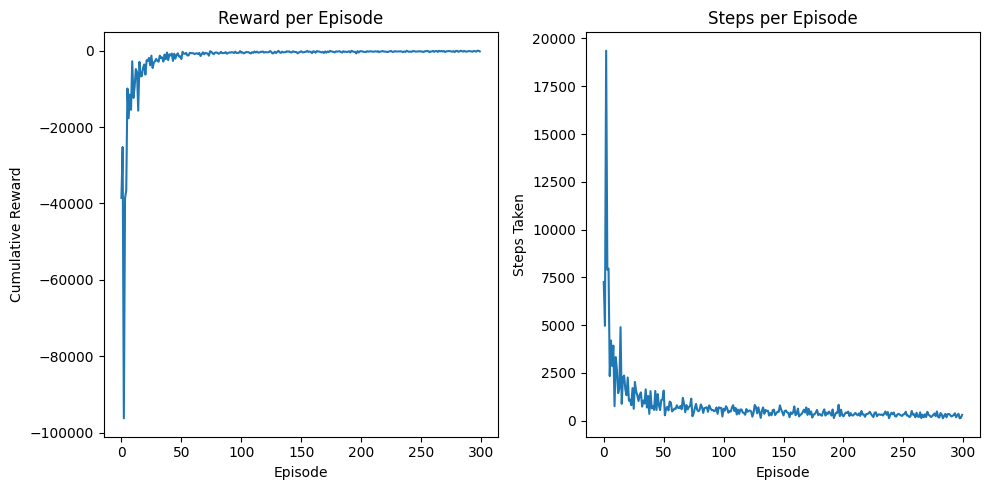

In [12]:
# Training the agent
train_agent(agent, maze, num_episodes=300)


Episode 1:
Starting at position (0, 0)
Q-values at start: [-16.00166281  -9.86659896 -15.539466   -14.99392341]
Actions represent: [Up, Down, Left, Right]
  Step 1: Moved Down to (1, 0)
  Step 2: Moved Up to (0, 0)
  Terminating episode: Loop detected
Episode 1 failed to reach goal after 2 steps with reward -2

Episode 2:
Starting at position (0, 0)
Q-values at start: [-16.00166281  -9.86659896 -15.539466   -14.99392341]
Actions represent: [Up, Down, Left, Right]
  Step 1: Moved Down to (1, 0)
  Step 2: Moved Up to (0, 0)
  Terminating episode: Loop detected
Episode 2 failed to reach goal after 2 steps with reward -2

Episode 3:
Starting at position (0, 0)
Q-values at start: [-16.00166281  -9.86659896 -15.539466   -14.99392341]
Actions represent: [Up, Down, Left, Right]
  Step 1: Moved Down to (1, 0)
  Step 2: Moved Up to (0, 0)
  Terminating episode: Loop detected
Episode 3 failed to reach goal after 2 steps with reward -2

Episode 4:
Starting at position (0, 0)
Q-values at start: [-

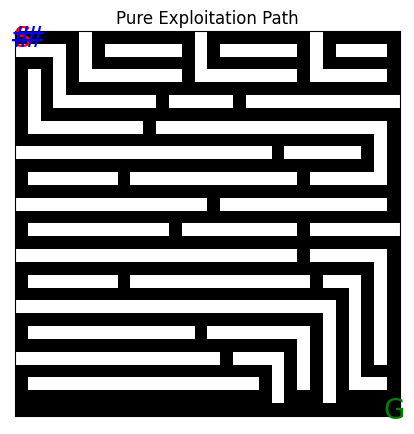


Analyzing Q-table for key positions:
  ⚠️ All Q-values near zero - agent hasn't learned this state!


(2.0, -2.0, 0.0)

In [13]:
exploit_agent(agent, maze, num_episodes=100)

Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (9, 4)-> (8, 4)-> (7, 4)-> (6, 

<Figure size 640x480 with 0 Axes>

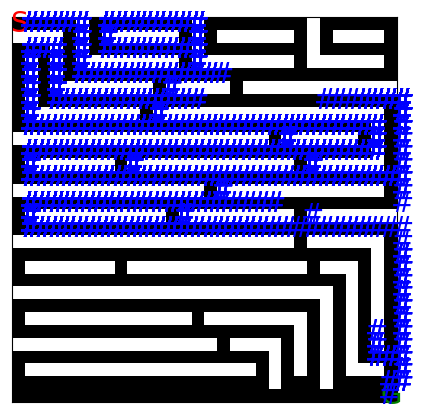

(13810, -70967)

In [14]:
test_agent(agent, maze)

## **Evaluating the Agent**

1. Test the agent again using the test_agent function. Run the code 10 times and note how many steps the agent takes to reach the goal. On average, how many steps does the agent take?
2. Does the agent consistently find the shortest path from the starting position to the goal?

## **Compare exploration vs exploitation performance**

 Compares the performance of the agent using:<br>
    1. Pure exploitation.<br>
    2. Mixed exploration/exploitation (as in regular test_agent).<br>

In [15]:
def compare_exploration_exploitation(agent, maze, num_episodes=10):
    """
    Compares the performance of the agent using:
    1. Pure exploitation
    2. Mixed exploration/exploitation (as in regular test_agent)

    Parameters:
    - agent: The trained QLearningAgent
    - maze: The Maze environment
    - num_episodes: Number of episodes to run for each method

    Returns:
    - Dictionary with performance metrics
    """
    print("Testing with PURE EXPLOITATION:")
    exploit_steps, exploit_rewards, exploit_success_rate = exploit_agent(agent, maze, num_episodes)

    print("\nTesting with EXPLORATION-EXPLOITATION MIX:")
    total_steps = 0
    total_rewards = 0
    successful_episodes = 0

    for i in range(num_episodes):
        print(f"Episode {i+1}:")
        steps, reward = test_agent(agent, maze)
        total_steps += steps
        total_rewards += reward

        # Determine if this episode was successful (roughly)
        if reward > 0:  # Assuming positive reward means success
            successful_episodes += 1

    explore_steps = total_steps / num_episodes
    explore_rewards = total_rewards / num_episodes
    explore_success_rate = (successful_episodes / num_episodes) * 100

    print(f"\nComparison Results:")
    print(f"Pure Exploitation - Success Rate: {exploit_success_rate:.2f}%, Avg Steps: {exploit_steps:.2f}, Avg Reward: {exploit_rewards:.2f}")
    print(f"Mixed Approach    - Success Rate: {explore_success_rate:.2f}%, Avg Steps: {explore_steps:.2f}, Avg Reward: {explore_rewards:.2f}")

    # Plot the comparison
    labels = ['Pure Exploitation', 'Mixed Approach']
    steps_data = [exploit_steps, explore_steps]
    rewards_data = [exploit_rewards, explore_rewards]
    success_data = [exploit_success_rate, explore_success_rate]

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.bar(labels, success_data, color=['blue', 'orange'])
    plt.ylabel('Success Rate (%)')
    plt.title('Success Rate Comparison')

    plt.subplot(1, 3, 2)
    plt.bar(labels, steps_data, color=['blue', 'orange'])
    plt.ylabel('Average Steps')
    plt.title('Steps Comparison')

    plt.subplot(1, 3, 3)
    plt.bar(labels, rewards_data, color=['blue', 'orange'])
    plt.ylabel('Average Reward')
    plt.title('Reward Comparison')

    plt.tight_layout()
    plt.show()

    return {
        'exploitation': {'steps': exploit_steps, 'rewards': exploit_rewards, 'success_rate': exploit_success_rate},
        'mixed': {'steps': explore_steps, 'rewards': explore_rewards, 'success_rate': explore_success_rate}
    }

Testing with PURE EXPLOITATION:

Episode 1:
Starting at position (0, 0)
Q-values at start: [-16.00166281  -9.86659896 -15.539466   -14.99392341]
Actions represent: [Up, Down, Left, Right]
  Step 1: Moved Down to (1, 0)
  Step 2: Moved Up to (0, 0)
  Terminating episode: Loop detected
Episode 1 failed to reach goal after 2 steps with reward -2

Episode 2:
Starting at position (0, 0)
Q-values at start: [-16.00166281  -9.86659896 -15.539466   -14.99392341]
Actions represent: [Up, Down, Left, Right]
  Step 1: Moved Down to (1, 0)
  Step 2: Moved Up to (0, 0)
  Terminating episode: Loop detected
Episode 2 failed to reach goal after 2 steps with reward -2

Episode 3:
Starting at position (0, 0)
Q-values at start: [-16.00166281  -9.86659896 -15.539466   -14.99392341]
Actions represent: [Up, Down, Left, Right]
  Step 1: Moved Down to (1, 0)
  Step 2: Moved Up to (0, 0)
  Terminating episode: Loop detected
Episode 3 failed to reach goal after 2 steps with reward -2

Episode 4:
Starting at posit

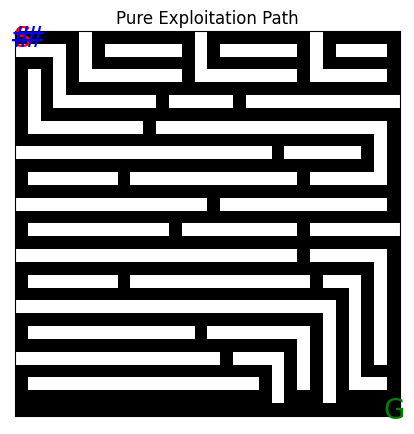


Analyzing Q-table for key positions:
  ⚠️ All Q-values near zero - agent hasn't learned this state!

Testing with EXPLORATION-EXPLOITATION MIX:
Episode 1:
Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (9, 4)-> (10, 4)-> (11, 4)-> (11, 5)-> (11, 4)-> (11, 5)-> (11, 4)-> (11, 5)-> (11, 4)-> (10, 4)-> (11, 4)-> (11, 5)-> (11, 4)-> (10, 4)-> (11, 4)-> (10, 4)-> (9, 4)-> (10, 4)-> (9, 4)-> (10, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (9

<Figure size 640x480 with 0 Axes>

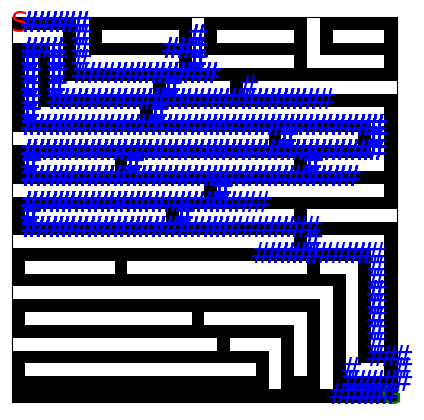

Episode 2:
Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (9, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (9, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (

<Figure size 640x480 with 0 Axes>

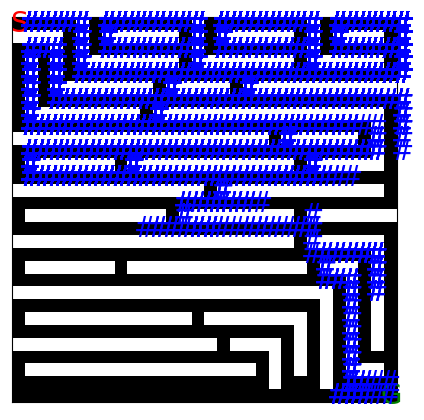

Episode 3:
Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (11, 4)-> (11, 5)-> (11, 4)-> (11, 5)-> (11, 4)-> (10, 4)-> (11, 4)-> (10, 4)-> (11, 4)-> (12, 4)-> (13, 4)-> (12, 4)-> (13, 4)-> (14, 4)-> (15, 4)-> (16, 4)-> (17, 4)-> (17, 5)-> (17, 6)-> (16, 6)-> (15, 6)-> (14, 6)-> (13, 6)-> (12, 6)-> (13, 6)-> (12, 6)-> (11, 6)-> (12, 6)-> (13, 6)-> (14, 6)-> (13, 6)-> (12, 6)-> (11, 6)-> (10, 6)-> (9, 6)-> (10, 6)-> (11, 6)-> (12, 6)-> (11, 6)-> (12, 6)-> (13, 6)-> (14, 6)-> (13, 6)-> (12, 6)-> (11, 6)-> (12, 6)-> (11, 6)-> (11, 5)-> (11, 4)-> (10, 4)-> (9, 4)-> (10, 4)-> (11, 4)-> (12, 4)-> (13, 4)-> (13, 3)-> (13, 2)-> (12, 2)-> (13, 2)-> (13, 3)-

<Figure size 640x480 with 0 Axes>

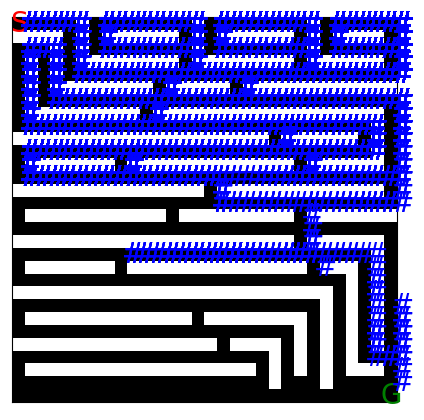

Episode 4:
Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (7,

<Figure size 640x480 with 0 Axes>

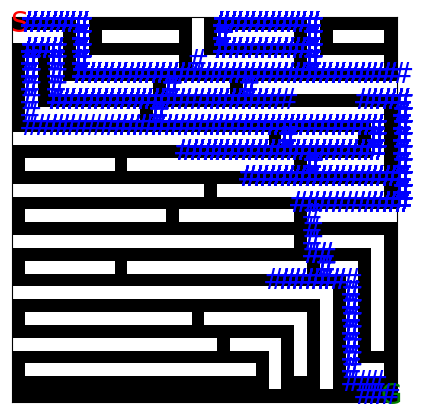

Episode 5:
Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> 

<Figure size 640x480 with 0 Axes>

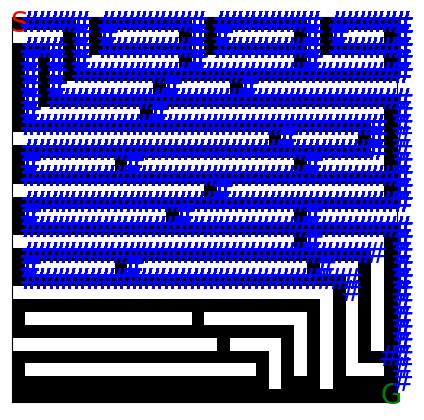

Episode 6:
Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 1)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1,

<Figure size 640x480 with 0 Axes>

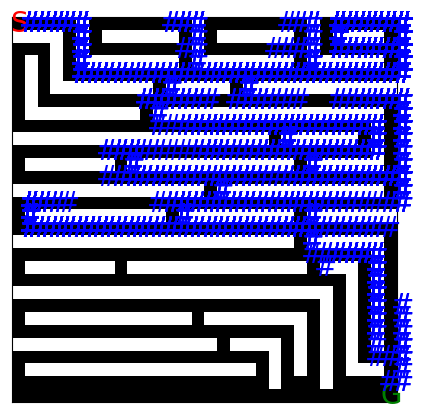

Episode 7:
Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 1)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3,

<Figure size 640x480 with 0 Axes>

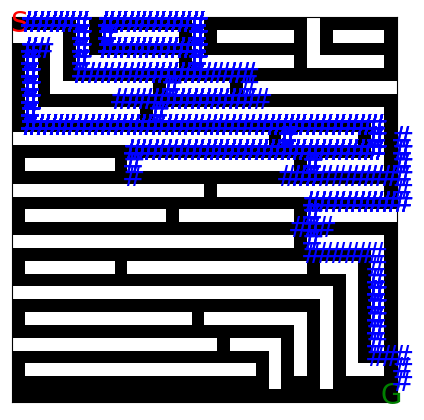

Episode 8:
Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 1)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (11, 4)-> (12, 4)-> (11, 4)-> (10, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (11, 4)-> (11, 5)-> (11, 4)-> (10, 4)-> (11, 4)-> (12, 4)-> (11, 4)-> (10, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (11, 4)-> (10, 4)-> (9, 4)-> (10, 4)-> (9,

<Figure size 640x480 with 0 Axes>

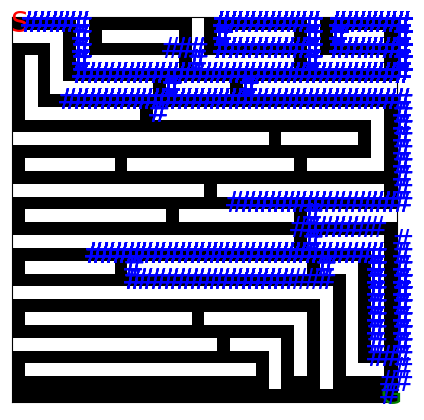

Episode 9:
Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (5,

<Figure size 640x480 with 0 Axes>

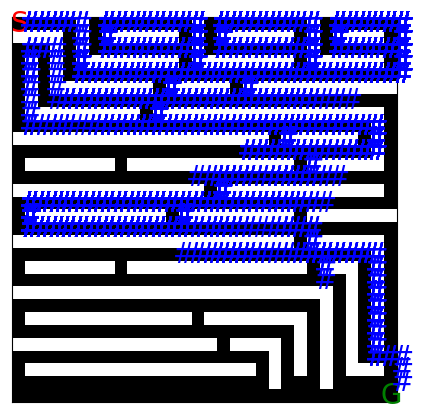

Episode 10:
Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (11, 4)-> (10, 4)-> (9, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (11, 4)-> (10, 4)-> (9, 4)-> (10, 4)-> (11, 4)-> (12, 4)-> (11, 4)-> (12, 4)-> (13, 4)-> (14, 4)-> (13, 4)-> (14, 4)-> (15, 4)-> (16, 4)-> (15, 4)-> (14, 4)-> (13, 4)-> (13, 3)-> (13, 2)-> (12, 2)-> (13, 2)-> (13, 3)-> (13, 4)-> (14, 4)-> (15, 4)-> (16, 4)-> (15, 4)-

<Figure size 640x480 with 0 Axes>

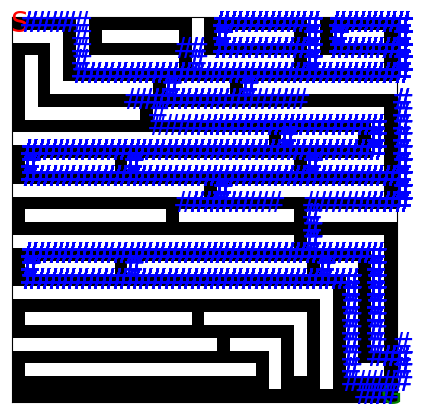


Comparison Results:
Pure Exploitation - Success Rate: 0.00%, Avg Steps: 2.00, Avg Reward: -2.00
Mixed Approach    - Success Rate: 0.00%, Avg Steps: 25675.70, Avg Reward: -132346.20


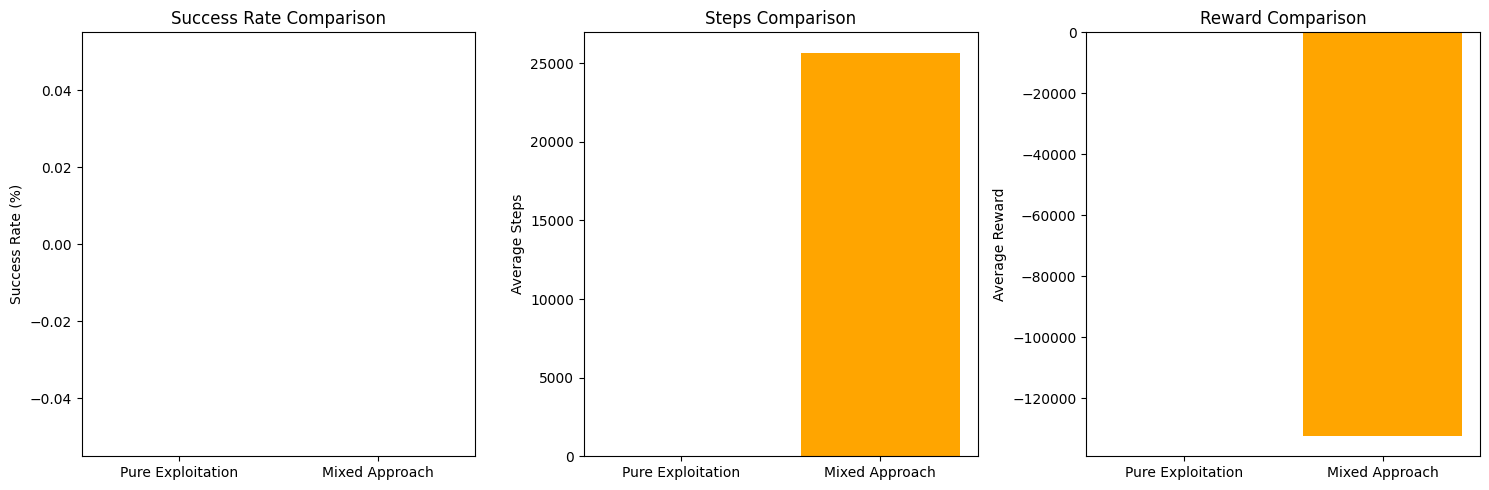

{'exploitation': {'steps': 2.0, 'rewards': -2.0, 'success_rate': 0.0},
 'mixed': {'steps': 25675.7, 'rewards': -132346.2, 'success_rate': 0.0}}

In [16]:
compare_exploration_exploitation(agent, maze, num_episodes=10)

The average reward is: -9944.44
The average steps is: 1994.4


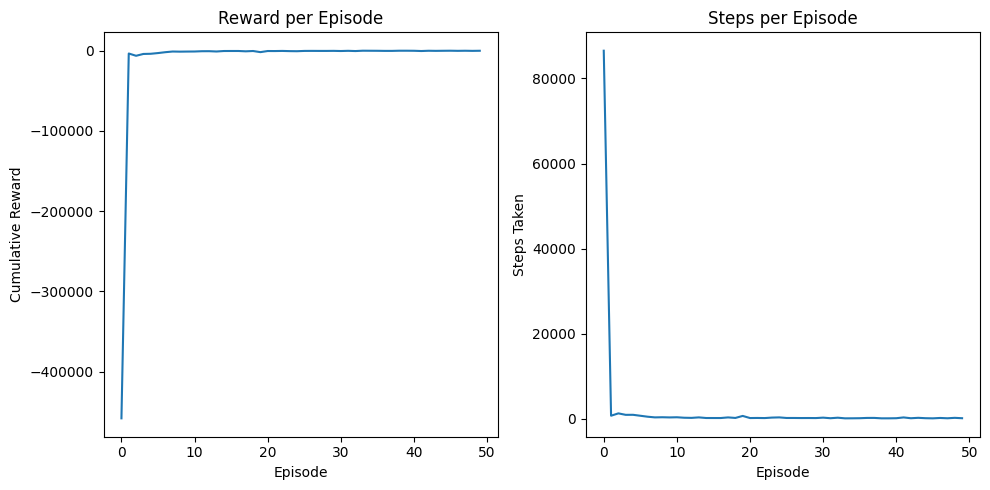

In [17]:
train_agent(agent, maze, num_episodes=50)

Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 1)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0

<Figure size 640x480 with 0 Axes>

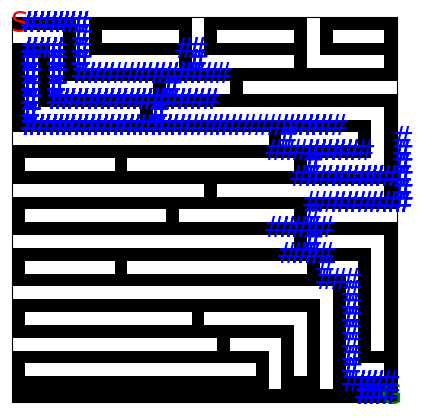

(2811, -14689)

In [18]:
test_agent(agent, maze, num_episodes=1)

## **Experimenting and Improving**

Try experimenting with a different reward system to see how that affects how the agent learns. Copy or run this cell multiple times, changing the goal reward from 0 to 1, 10, 20, 30, etc.. and to 100, and 1000.

The average reward is: -84855106.3
The average steps is: 7883109.87


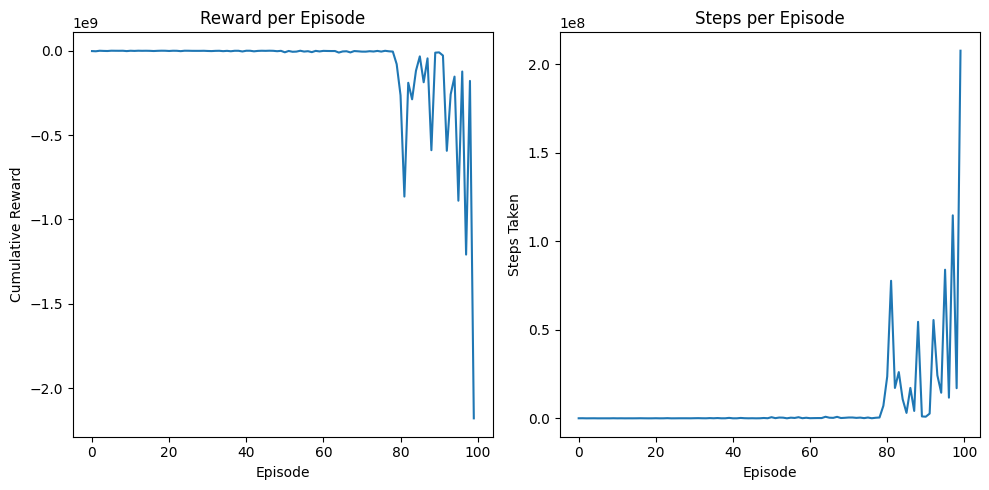

In [19]:
goal_reward = 1000
wall_penalty = -10
step_penalty = -100

agent = QLearningAgent(maze)

train_agent(agent, maze, num_episodes=100)

The average reward is: -3960.36
The average steps is: 1521.56


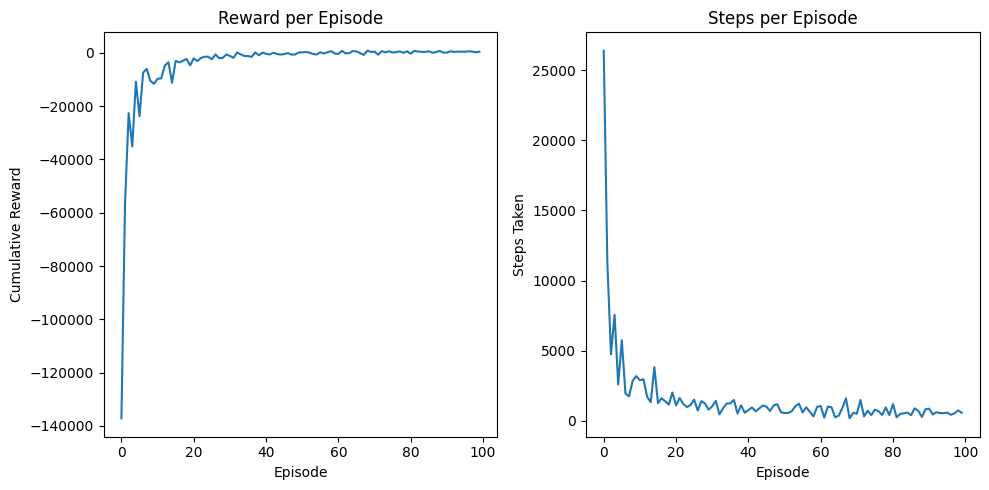

In [20]:
goal_reward = 1000
wall_penalty = -10
step_penalty = -1

agent = QLearningAgent(maze)

train_agent(agent, maze, num_episodes=100)

Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (9, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 1)-> (4,

<Figure size 640x480 with 0 Axes>

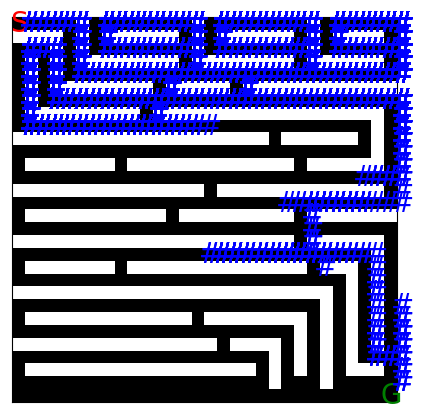

(17380, -88757)

In [21]:
test_agent(agent, maze, num_episodes=1)


Episode 1:
Starting at position (0, 0)
Q-values at start: [-15.80877289  -9.18193323 -16.09142598 -16.06606343]
Actions represent: [Up, Down, Left, Right]
  Step 1: Moved Down to (1, 0)
  Step 2: Moved Up to (0, 0)
  Terminating episode: Loop detected
Episode 1 failed to reach goal after 2 steps with reward -2

Episode 2:
Starting at position (0, 0)
Q-values at start: [-15.80877289  -9.18193323 -16.09142598 -16.06606343]
Actions represent: [Up, Down, Left, Right]
  Step 1: Moved Down to (1, 0)
  Step 2: Moved Up to (0, 0)
  Terminating episode: Loop detected
Episode 2 failed to reach goal after 2 steps with reward -2

Episode 3:
Starting at position (0, 0)
Q-values at start: [-15.80877289  -9.18193323 -16.09142598 -16.06606343]
Actions represent: [Up, Down, Left, Right]
  Step 1: Moved Down to (1, 0)
  Step 2: Moved Up to (0, 0)
  Terminating episode: Loop detected
Episode 3 failed to reach goal after 2 steps with reward -2

Episode 4:
Starting at position (0, 0)
Q-values at start: [-

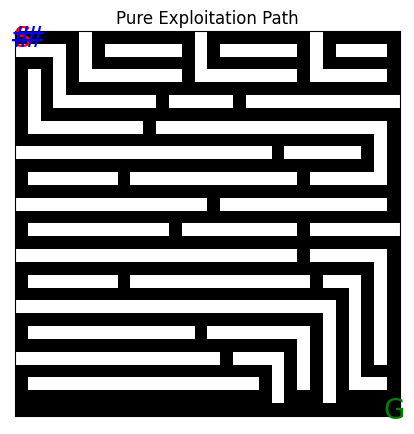


Analyzing Q-table for key positions:
  ⚠️ All Q-values near zero - agent hasn't learned this state!


(2.0, -2.0, 0.0)

In [22]:
exploit_agent(agent, maze, num_episodes=10)

Testing with PURE EXPLOITATION:

Episode 1:
Starting at position (0, 0)
Q-values at start: [-15.80877289  -9.18193323 -16.09142598 -16.06606343]
Actions represent: [Up, Down, Left, Right]
  Step 1: Moved Down to (1, 0)
  Step 2: Moved Up to (0, 0)
  Terminating episode: Loop detected
Episode 1 failed to reach goal after 2 steps with reward -2

Episode 2:
Starting at position (0, 0)
Q-values at start: [-15.80877289  -9.18193323 -16.09142598 -16.06606343]
Actions represent: [Up, Down, Left, Right]
  Step 1: Moved Down to (1, 0)
  Step 2: Moved Up to (0, 0)
  Terminating episode: Loop detected
Episode 2 failed to reach goal after 2 steps with reward -2

Episode 3:
Starting at position (0, 0)
Q-values at start: [-15.80877289  -9.18193323 -16.09142598 -16.06606343]
Actions represent: [Up, Down, Left, Right]
  Step 1: Moved Down to (1, 0)
  Step 2: Moved Up to (0, 0)
  Terminating episode: Loop detected
Episode 3 failed to reach goal after 2 steps with reward -2

Episode 4:
Starting at posit

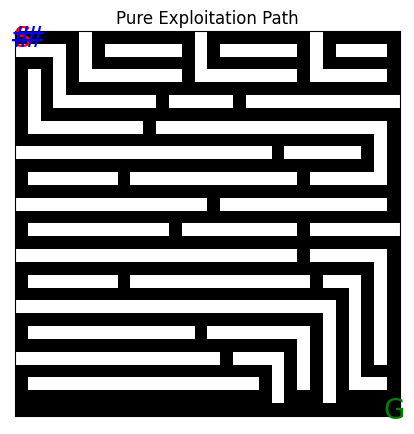


Analyzing Q-table for key positions:
  ⚠️ All Q-values near zero - agent hasn't learned this state!

Testing with EXPLORATION-EXPLOITATION MIX:
Episode 1:
Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 0)-> (3

<Figure size 640x480 with 0 Axes>

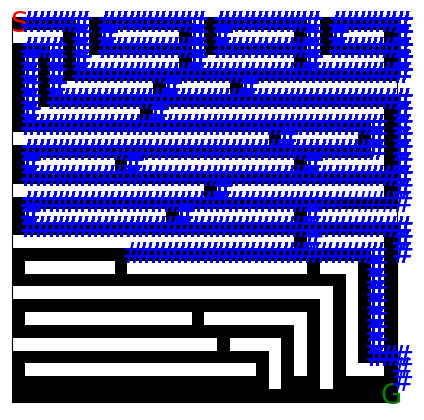

Episode 2:
Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (11, 4)-> (11, 5)-> (11, 6)-> (10, 6)-> (10, 7)-> (10, 8)-> (9, 8)-> (8, 8)-> (9, 8)-> (8, 8)-> (7, 8)-> (8, 8)-> (7, 8)-> (6, 8)-> (5, 8)-> (6, 8)-> (7, 8)-> (8, 8)-> (7, 8)-> (6, 8)-> (7, 8)-> (8, 8)-> (7, 8)-> (8, 8)-> (7, 8)-> (8, 8)-> (9, 8)-> (10, 8)-> (9, 8)-> (8, 8)-> (9, 8)-> (10, 8)-> (9, 8)-> (8, 8)-> (9, 8)-> (10, 8)-> (10, 7)-> (10, 8)-> (11, 8)-> (12, 8)-> (11, 8)-> (10, 8)-> (9, 8)-> (8, 8)-> (9, 8)-> (10, 8)-> (9, 8)-> (10, 8)-> (10, 7)-> (10, 8)-> (10, 7)-> (10, 6)-> (10, 7)-> (10, 6)-> (9, 6)-> (8, 6)-> (7, 6)-> (6, 6)

<Figure size 640x480 with 0 Axes>

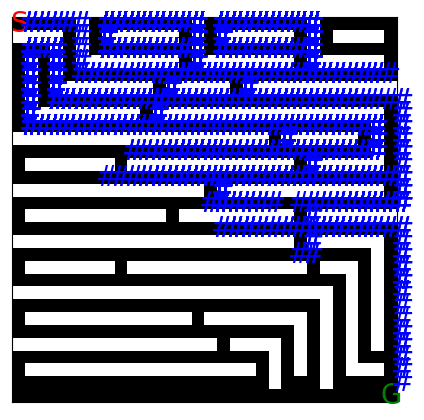

Episode 3:
Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (11, 4)-> (12, 4)-> (13, 4)-> (13, 3)-> (13, 4)-> (12, 4)-> (11, 4)-> (10, 4)-> (11, 4)-> (11, 5)-> (11, 4)-> (10, 4)-> (11, 4)-> (10, 4)-> (11, 4)-> (10, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (9, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (7,

<Figure size 640x480 with 0 Axes>

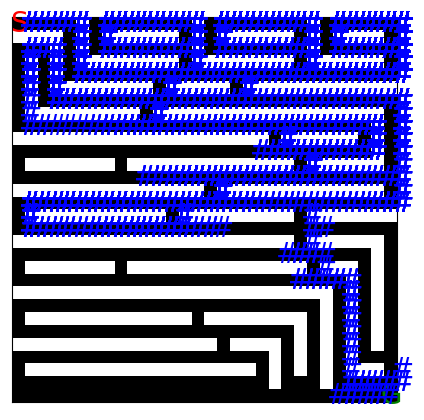

Episode 4:
Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (11, 4)-> (11, 5)-> (11, 6)-> (12, 6)-> (13, 6)-> (12, 6)-> (11, 6)-> (12, 6)-> (13, 6)-> (12, 6)-> (11, 6)-> (10, 6)-> (11, 6)-> (11, 5)-> (11, 4)-> (10, 4)-> (11, 4)-> (12, 4)-> (11, 4)-> (11, 5)-> (11, 6)-> (11, 5)-> (11, 6)-> (12, 6)-> (13, 6)-> (12, 6)-> (11, 6)-> (10, 6)-> (11, 6)-> (12, 6)-> (13, 6)-> (12, 6)-> (13, 6)-> (12, 6)-> (13, 6)-> (14, 6)-> (15, 6)-> (14, 6)-> (15, 6)-> (16, 6)-> (15, 6)-> (16, 6)-> (17, 6)-> (17, 5)-> (17, 4)-> (17, 5)-> (17, 4)-> (17, 5)-> (17, 4)-> (16, 4)-> (17, 4)-> (18, 4)-> (19, 4)-> (20, 4)-> (19, 4)-> (20, 4)-> (21, 4)-> (20, 4)-> (21, 4)-> (22, 4)-> (21, 4)-> (20, 4)-> (19, 4)-> (18, 4)-> (17, 4)-> 

<Figure size 640x480 with 0 Axes>

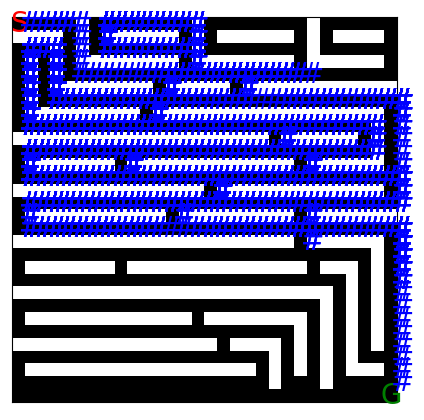

Episode 5:
Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (11, 4)-> (10, 4)-> (9, 4)-> (10, 4)-> (9, 4)-> (10, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (9, 4)-> (10, 4)-> (11, 4)-> (11, 5)-> (11, 6)-> (10, 6)-> (9, 6)-> (10, 6)-> (10, 7)-> (10, 8)-> (10, 7)-> (10, 6)-> (9, 6)-> (8, 6)-> (7, 6)-> (6, 6)-> (5, 6)-> (6, 6)-> (7, 6)-> (8, 6)-> (7, 6)-> (8, 6)-> (7, 6)-> (8, 6)-> (9, 6)-> (10, 6)-> (10,

<Figure size 640x480 with 0 Axes>

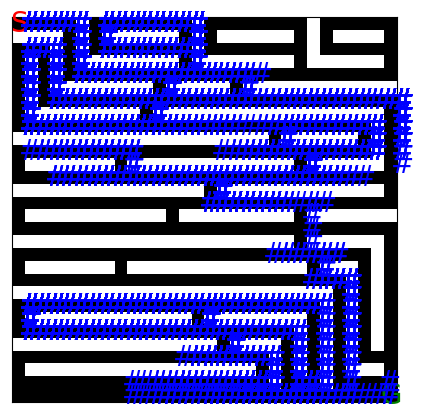

Episode 6:
Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (11, 4)-> (11, 5)-> (11, 6)-> (10, 6)-> (9, 6)-> (8, 6)-> (9, 6)-> (8, 6)-> (7, 6)-> (6, 6)-> (7, 6)-> (8, 6)-> (9, 6)-> (10, 6)-> (11, 6)-> (12, 6)-> (13, 6)-> (14, 6)-> (13, 6)-> (12, 6)-> (11, 6)-> (11, 5)-> (11, 6)-> (11, 5)-> (11, 6)-> (11, 5)-> (11, 6)-> (10, 6)-> (11, 6)-> (12, 6)-> (13, 6)-> (14, 6)-> (13, 6)-> (12, 6)-> (11, 6)-> (12, 6)-> (11, 6)-> (12, 6)-> (11, 6)-> (10, 6)-> (9, 6)-> (10, 6)-> (10, 7)-> (10, 8)-> (11, 8)-> (10, 8)-> (10, 7)-> (10, 8)-> (11, 8)-> (10, 8)-> (9, 8)-> (10, 8)-> (9, 8)-> (8, 8)-> (9, 8)-> (8, 8)

<Figure size 640x480 with 0 Axes>

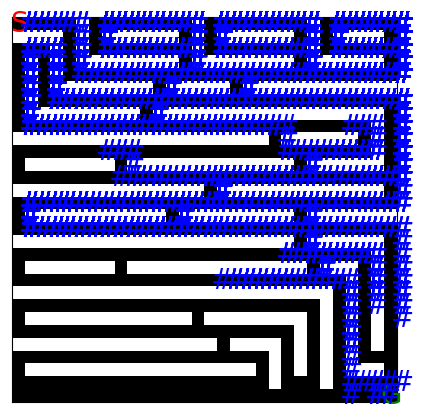

Episode 7:
Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (11, 4)-> (12, 4)-> (13, 4)-> (12, 4)-

<Figure size 640x480 with 0 Axes>

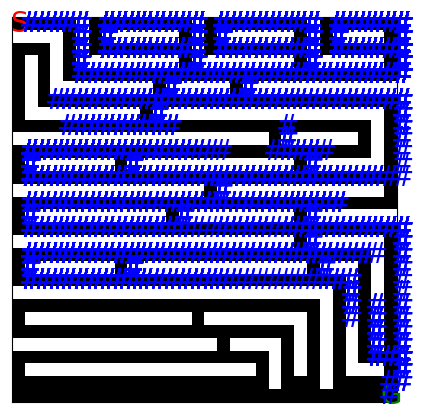

Episode 8:
Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (9, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (7, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7

<Figure size 640x480 with 0 Axes>

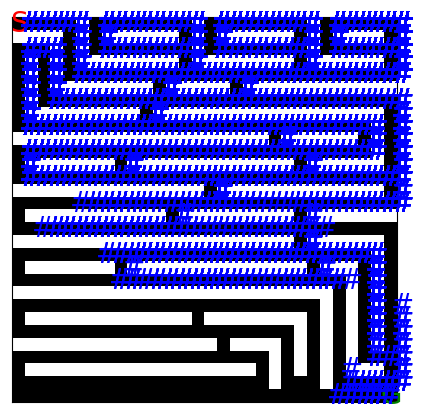

Episode 9:
Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (7, 4)-> (8, 4)-> (7, 4)-> (8, 4)-> (9, 4)-> (10, 4)-> (9, 4)-> (10, 4)-> (11, 4)-> (11, 5)-> (11, 6)-> (11, 5)-> (11, 4)-> (11, 5)-> (11, 4)-> (12, 4)-> (13, 4)-> (13, 3)-> (13, 2)-> (12, 2)-> (13, 2)-> (13, 3)-> (13, 4)-> (14, 4)-> (15, 4)-> (16, 4)-> (15, 4)-> (16, 4)-> (17, 4)-> (18, 4)-> (17, 4)-> (18, 4)-> (17, 4)-> (17, 5)-> (17, 6)-> (17, 5)-> (17, 4)-> (17, 5)-> (17, 4)-> (17, 5)-> (17, 6)-> (16, 6)-> (15, 6)-> (14, 6)-> (13, 6)-> (14, 6)-> (15, 6)-> (14, 6)-> (13, 6)-> (14, 6)-> (13, 6)-> (12, 6)-> (11, 6)-> (10, 6)-> (10, 7)-> (10, 8)-> (10, 7)-> (10, 8)-> (9, 8

<Figure size 640x480 with 0 Axes>

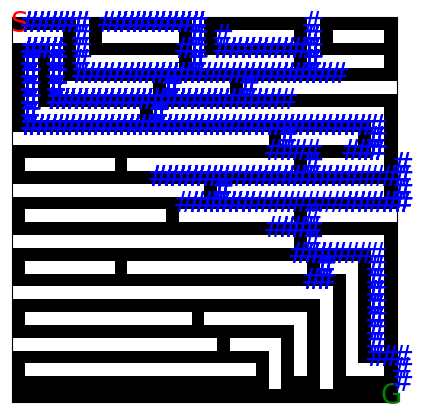

Episode 10:
Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 1)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3

<Figure size 640x480 with 0 Axes>

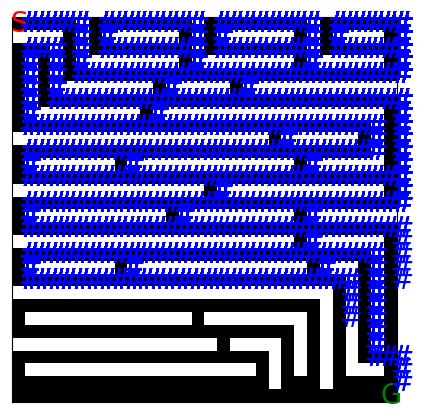


Comparison Results:
Pure Exploitation - Success Rate: 0.00%, Avg Steps: 2.00, Avg Reward: -2.00
Mixed Approach    - Success Rate: 0.00%, Avg Steps: 56632.30, Avg Reward: -290917.40


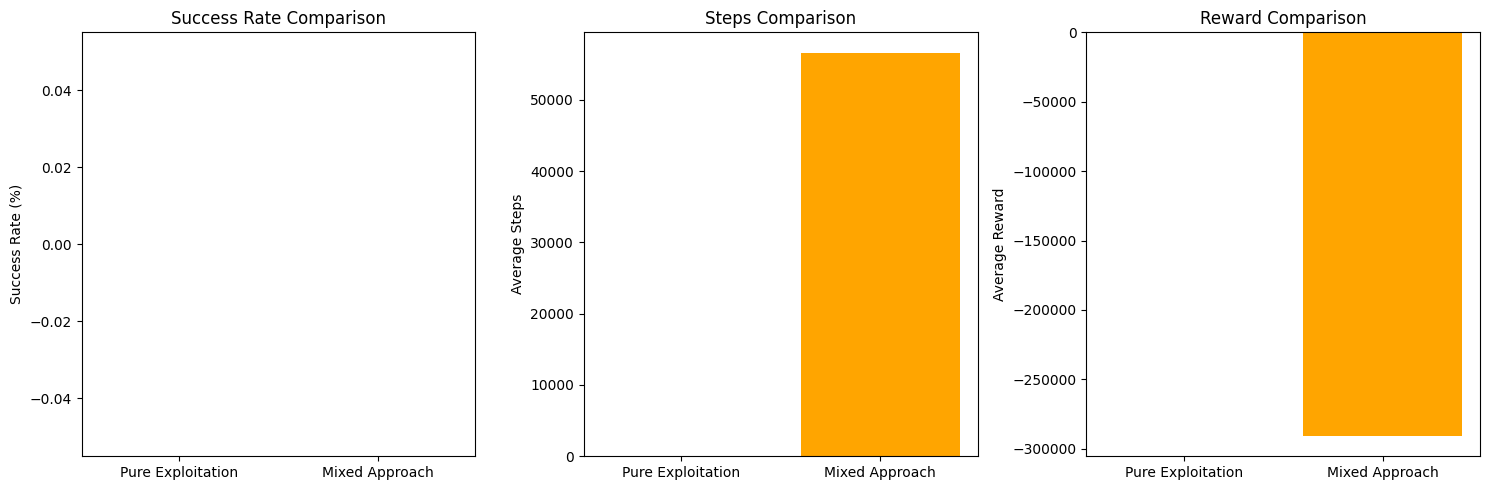

{'exploitation': {'steps': 2.0, 'rewards': -2.0, 'success_rate': 0.0},
 'mixed': {'steps': 56632.3, 'rewards': -290917.4, 'success_rate': 0.0}}

In [23]:
compare_exploration_exploitation(agent, maze, num_episodes=10)

Learned Path:
(0, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 3)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4)-> (5, 4)-> (4, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 4)-> (5, 4)-> (4, 4)-> (4, 3)-> (4, 2)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (3, 0)-> (2, 0)-> (1, 0)-> (2, 0)-> (1, 0)-> (0, 0)-> (1, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 2)-> (4, 1)-> (4, 2)-> (4, 3)-> (4, 4)-> (5, 4)-> (6, 4

<Figure size 640x480 with 0 Axes>

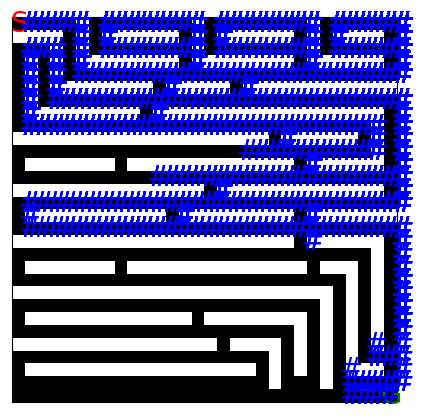

(53511, -276601)

In [24]:
# Testing the agent after training
test_agent(agent, maze, num_episodes=1)

## **Variation: Creating More Mazes**

Create new mazes and test how well the agent performs in more complex mazes with multiple paths and dead ends

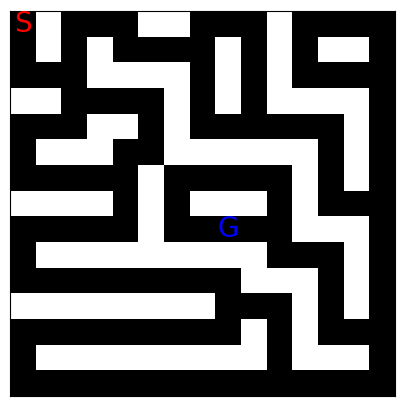

In [25]:
m = 8
n = 8
# Create any maze layout you'd like
# maze_layout = (1- np.eye(m)) + (1-np.eye(m,k=1))
maze_layout = np.array([
    [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])


# Create an instance of the maze and set the starting and ending positions
start_x = 0
start_y = 0
goal_x = n
goal_y = n
maze = Maze(maze_layout, (start_x, start_y), (goal_x, goal_y))
# Visualize the maze
maze.show_maze()

In [26]:
# Create the agent object
agent = QLearningAgent(maze)
# Test the agent using the test_agent function
# test_agent(agent, maze)

The average reward is: -2976.95
The average steps is: 973.525


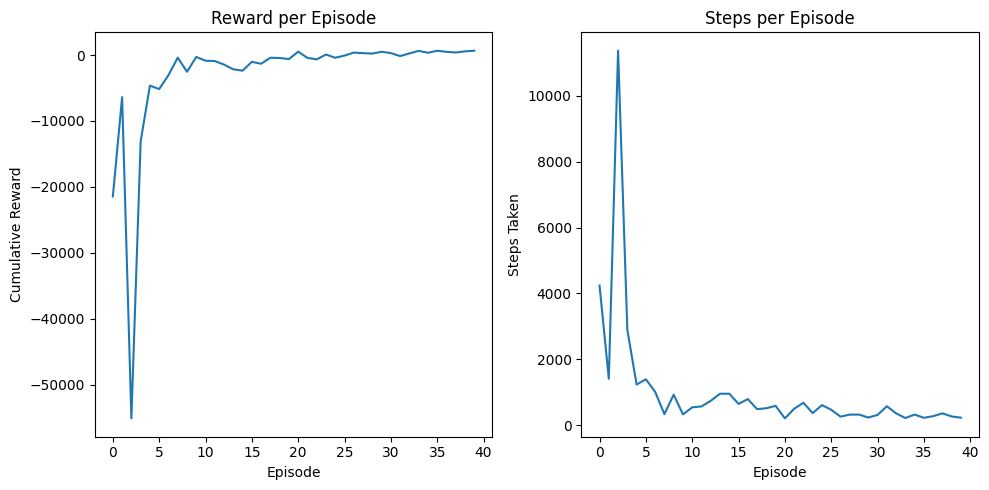

In [27]:
# # Training the agent
train_agent(agent, maze, num_episodes=40)

Learned Path:
(0, 0)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 1)-> (2, 2)-> (2, 3)-> (2, 4)-> (1, 4)-> (2, 4)-> (1, 4)-> (0, 4)-> (0, 5)-> (0, 6)-> (1, 6)-> (2, 6)-> (3, 6)-> (2, 6)-> (1, 6)-> (0, 6)-> (0, 5)-> (0, 4)-> (0, 5)-> (0, 4)-> (0, 5)-> (0, 4)-> (1, 4)-> (2, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (2, 4)-> (1, 4)-> (2, 4)-> (2, 3)-> (2, 2)-> (2, 3)-> (2, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (2, 4)-> (2, 3)-> (3, 3)-> (4, 3)-> (3, 3)-> (2, 3)-> (3, 3)-> (4, 3)-> (3, 3)-> (4, 3)-> (5, 3)-> (4, 3)-> (5, 3)-> (5, 4)-> (5, 3)-> (4, 3)-> (5, 3)-> (5, 4)-> (5, 3)-> (5, 4)-> (5, 3)-> (5, 4)-> (5, 3)-> (4, 3)-> (5, 3)-> (4, 3)-> (3, 3)-> (2, 3)-> (2, 2)-> (2, 3)-> (3, 3)-> (4, 3)-> (5, 3)-> (4, 3)-> (3, 3)-> (2, 3)-> (2, 2)-> (2, 3)-> (2, 2)-> (2, 3)-> (3, 3)-> (2, 3)-> (2, 4)-> (1, 4)-> (2, 4)-> (2, 3)-> (3, 3)-> (4, 3)-> (5, 3)-> (4, 3)-> (3, 3)-> (4, 3)-> (3, 3)-> (4, 3)-> (5, 3)-> (4, 3)-> (5, 3)-> (5, 4)-> (5, 3)-> (5, 4)-> (5, 3)-> (4, 3)-> (5, 3

<Figure size 640x480 with 0 Axes>

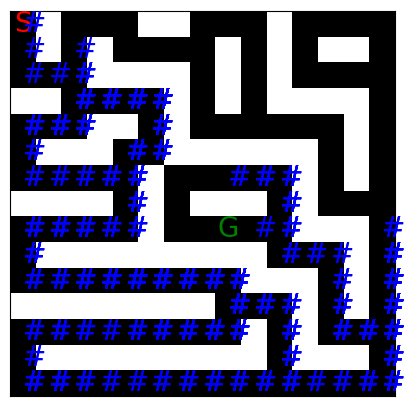

(1585, -7253)

In [28]:
# # Testing agent again after training, feel free to run multiple times
test_agent(agent, maze)

Testing with PURE EXPLOITATION:

Episode 1:
Starting at position (0, 0)
Q-values at start: [-14.99813611 -15.17487525 -14.50250183  -7.35958433]
Actions represent: [Up, Down, Left, Right]
  Step 1: Moved Right to (0, 1)
  Step 2: Moved Left to (0, 0)
  Terminating episode: Loop detected
Episode 1 failed to reach goal after 2 steps with reward -2

Episode 2:
Starting at position (0, 0)
Q-values at start: [-14.99813611 -15.17487525 -14.50250183  -7.35958433]
Actions represent: [Up, Down, Left, Right]
  Step 1: Moved Right to (0, 1)
  Step 2: Moved Left to (0, 0)
  Terminating episode: Loop detected
Episode 2 failed to reach goal after 2 steps with reward -2

Episode 3:
Starting at position (0, 0)
Q-values at start: [-14.99813611 -15.17487525 -14.50250183  -7.35958433]
Actions represent: [Up, Down, Left, Right]
  Step 1: Moved Right to (0, 1)
  Step 2: Moved Left to (0, 0)
  Terminating episode: Loop detected
Episode 3 failed to reach goal after 2 steps with reward -2

Episode 4:
Starting

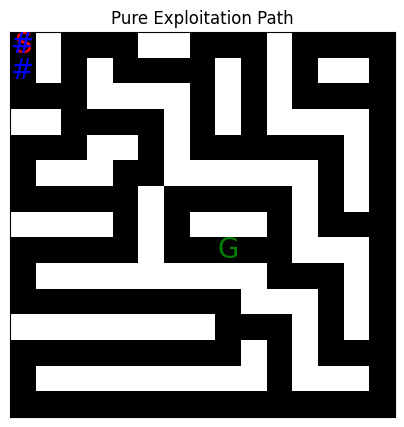


Analyzing Q-table for key positions:
  ⚠️ All Q-values near zero - agent hasn't learned this state!

Testing with EXPLORATION-EXPLOITATION MIX:
Episode 1:
Learned Path:
(0, 0)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 3)-> (3, 3)-> (2, 3)-> (2, 2)-> (2, 3)-> (2, 2)-> (2, 3)-> (2, 4)-> (1, 4)-> (2, 4)-> (1, 4)-> (2, 4)-> (1, 4)-> (0, 4)-> (0, 5)-> (0, 6)-> (0, 5)-> (0, 4)-> (0, 5)-> (0, 6)-> (1, 6)-> (2, 6)-> (3, 6)-> (2, 6)-> (3, 6)-> (4, 6)-> (3, 6)-> (2, 6)-> (3, 6)-> (2, 6)-> (3, 6)-> (2, 6)-> (3, 6)-> (2, 6)-> (1, 6)-> (2, 6)-> (1, 6)-> (2, 6)-> (3, 6)-> (4, 6)-> (4, 5)-> (5, 5)-> (5, 4)-> (5, 5)-> (5, 4)-> (5, 3)-> (5, 4)-> (5, 3)-> (5, 4)-> (5, 5)-> (5, 4)-> (5, 3)-> (5, 4)-> (5, 3)-> (5, 4)-> (5, 5)-> (4, 5)-> (5, 5)-> (5, 4)-> (5, 5)-> (5, 4)-> (5, 5)-> (5, 4)-> (5, 5)-> (5, 4)-> (5, 5)-> (4

<Figure size 640x480 with 0 Axes>

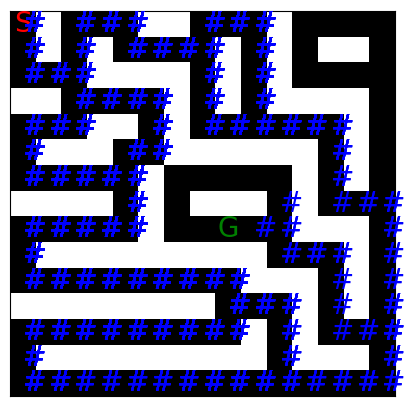

Episode 2:
Learned Path:
(0, 0)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 3)-> (3, 3)-> (4, 3)-> (3, 3)-> (2, 3)-> (2, 2)-> (1, 2)-> (0, 2)-> (1, 2)-> (2, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 1)-> (2, 0)-> (3, 0)-> (2, 0)-> (2, 1)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (5, 1)-> (4, 1)-> (5, 1)-> (4, 1)-> (4, 0)-> (4, 1)-> (5, 1)-> (4, 1)-> (5, 1)-> (6, 1)-> (7, 1)-> (7, 2)-> (7, 1)-> (6, 1)-> (5, 1)-> (4, 1)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (2, 1)-> (2, 2)-> (2, 3)-> (2, 4)-> (2, 3)-> (2, 4)-> (1, 4)-> (2, 4)-> (1,

<Figure size 640x480 with 0 Axes>

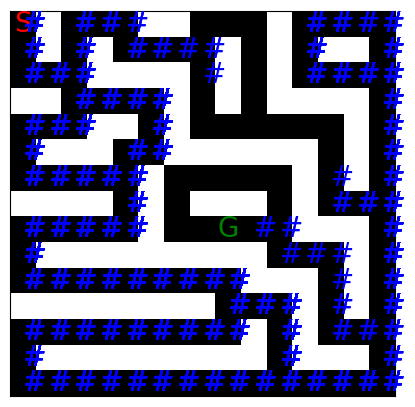

Episode 3:
Learned Path:
(0, 0)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 3)-> (3, 3)-> (2, 3)-> (2, 2)-> (2, 3)-> (3, 3)-> (4, 3)-> (5, 3)-> (5, 4)-> (5, 5)-> (5, 4)-> (5, 3)-> (5, 4)-> (5, 3)-> (4, 3)-> (5, 3)-> (4, 3)-> (5, 3)-> (5, 4)-> (5, 3)-> (5, 4)-> (5, 3)-> (5, 4)-> (5, 5)-> (5, 4)-> (5, 3)-> (5, 4)-> (5, 5)-> (4, 5)-> (4, 6)-> (4, 7)-> (4, 6)-> (4, 7)-> (4, 6)-> (4, 5)-> (5, 5)-> (5, 4)-> (5, 3)-> (5, 4)-> (5, 5)-> (5, 4)-> (5, 5)-> (5, 4)-> (5, 3)-> (5, 4)-> (5, 5)-> (5, 4)-> (5, 3)-> (5, 4)-> (5, 5)-> (4, 5)-> (5, 5)-> (5, 4)-> (5, 5)-> (4, 5)-> (5, 5)-> (5,

<Figure size 640x480 with 0 Axes>

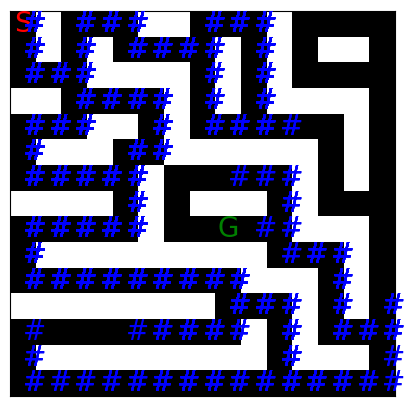

Episode 4:
Learned Path:
(0, 0)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (1, 2)-> (2, 2)-> (2, 1)-> (2, 2)-> (2, 1)-> (2, 2)-> (2, 3)-> (3, 3)-> (4, 3)-> (5, 3)-> (4, 3)-> (3, 3)-> (2, 3)-> (3, 3)-> (2, 3)-> (2, 2)-> (2, 1)-> (2, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (1, 2)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (1,

<Figure size 640x480 with 0 Axes>

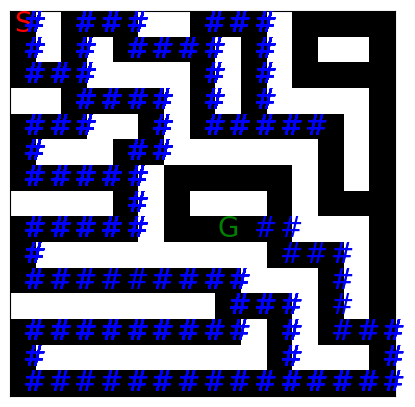

Episode 5:
Learned Path:
(0, 0)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (1, 2)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (1, 2)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 1)-> (2, 2)-> (1, 2)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 1)-> (2, 2)-> (2, 3)-> (2, 2)-> (2, 3)-> (2, 2)-> (2, 3)-> (3, 3)-> (2, 3)-> (3, 3)-> (2, 3)-> (2, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (2, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (0, 4)-> (0, 5)-> (0, 6)-> (0, 5)-> (0, 6)-> (1, 6)-> (2, 6)-> (1, 6)-> (0, 6)-> (0, 5)-> (0, 6)-> (1, 6)-> (0, 6)-> (0, 5)-> (0, 6)-> (0, 5)-> (0, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (2, 4)-> (1, 4)-> (2, 4)-> (2, 3)-> (3, 3)-> (4, 3)-> (3, 3)-> (2, 3)-> (3, 3)-> (4, 3)-> (5, 3)-> (5, 4)-> (5, 5)-> (4, 5)-> (5, 5)-> (5, 4)-> (5, 3)-> (5,

<Figure size 640x480 with 0 Axes>

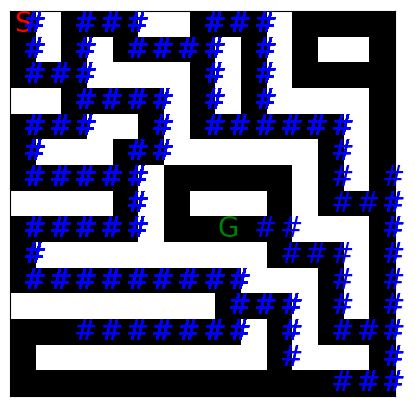

Episode 6:
Learned Path:
(0, 0)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 1)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (3, 0)-> (2, 0)-> (2, 1)-> (2, 2)-> (1, 2)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (1, 2)-> (2, 2)-> (2, 3)-> (3, 3)-> (2, 3)-> (2, 4)-> (2, 3)-> (2, 2)-> (2, 3)-> (2, 4)-> (2, 3)-> (3, 3)-> (4, 3)-> (3, 3)-> (4, 3)-> (3, 3)-> (2, 3)-> (2, 2)-> (2, 3)-> (2, 2)-> (2, 1)-> (2, 0)-> (2, 1)-> (2, 0)-> (2, 1)-> (2, 2)-> (2, 3)-> (3, 3)-> (2, 3)-> (2, 4)-> (1, 4)-> (0, 4)-> (0, 5)-> (0, 6)-> (1, 6)-> (0, 6)-> (0, 5)-> (0, 6)-> (1, 6)-> (0, 6)-> (1, 6)-> (0, 6)-> (0, 5)-> (0, 6)-> (1, 6)-> (0, 6)-> (1, 6)-> (0, 6)-> (0, 5)-> (0, 4)-> (1, 4)-> (0, 4)-> (0, 5)-> (0, 4)-> (0, 5)-> (0, 6)-> (0, 5)-> (0, 4)-> (1, 4)-> (0, 4)-> (0, 5)-> (0, 6)-> (1, 6)-> (0, 6)-> (1, 6)-> (0, 6)-> (1,

<Figure size 640x480 with 0 Axes>

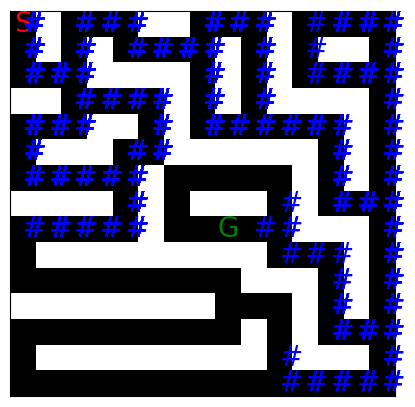

Episode 7:
Learned Path:
(0, 0)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (1, 2)-> (0, 2)-> (1, 2)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 1)-> (2, 0)-> (2, 1)-> (2, 2)-> (2, 1)-> (2, 0)-> (2, 1)-> (2, 0)-> (2, 1)-> (2, 0)-> (2, 1)-> (2, 2)-> (2, 1)-> (2, 0)-> (2, 1)-> (2, 0)-> (2, 1)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (2, 1)-> (2, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 1)-> (2, 2)-> (2, 1)-> (2, 2)-> (2, 3)-> (2, 4)-> (1, 4)-> (0, 4)-> (0, 5)-> (0, 6)-> (1, 6)-> (0, 6)-> (0, 5)-> (0, 4)-> (0, 5)-> (0, 6)-> (1, 6)-> (0, 6)-> (0, 5)-> (0, 4)-> (0, 5)-> (0, 6)-> (0, 5)-> (0, 6)-> (0, 5)-> (0, 4)-> (0, 5)-> (0, 6)-> (1, 6)-> (2, 6)-> (3, 6)-> (2, 6)-> (3, 6)-> (2, 6)-> (1, 6)-> (0, 6)-> (1, 6)-> (0, 6)-> (0,

<Figure size 640x480 with 0 Axes>

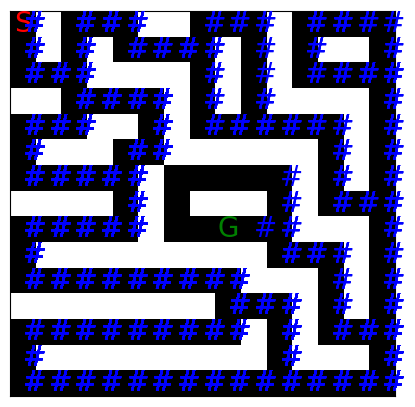

Episode 8:
Learned Path:
(0, 0)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 3)-> (3, 3)-> (4, 3)-> (3, 3)-> (4, 3)-> (3, 3)-> (2, 3)-> (2, 4)-> (1, 4)-> (2, 4)-> (1, 4)-> (0, 4)-> (0, 5)-> (0, 6)-> (1, 6)-> (0, 6)-> (1, 6)-> (2, 6)-> (3, 6)-> (2, 6)-> (3, 6)-> (2, 6)-> (1, 6)-> (0, 6)-> (1, 6)-> (0, 6)-> (0, 5)-> (0, 6)-> (1, 6)-> (0, 6)-> (0, 5)-> (0, 6)-> (0, 5)-> (0, 4)-> (0, 5)-> (0, 6)-> (0, 5)-> (0, 6)-> (1, 6)-> (2, 6)-> (1, 6)-> (2, 6)-> (3, 6)-> (2, 6)-> (3, 6)-> (2, 6)-> (3, 6)-> (2, 6)-> (3, 6)-> (2, 6)-> (1, 6)-> (0, 6)-> (1, 6)-> (0, 6)-> (1, 6)-> (2, 6)-> (3, 6)-> (2, 6)-> (3, 6)-> (4, 6)-> (3, 6)-> (2, 6)-> (3, 6)-> (2, 6)-> (3, 6)-> (2, 6)-> (3, 6)-> (2, 6)-> (3, 6)-> (2, 6)-> (3, 6)-> (2, 6)-> (1, 6)-> (2, 6)-> (3, 6)-> (2, 6)-> (3, 6)-> (4, 6)-> (3, 6)-> (4, 6)-> (4, 5)-> (4, 6)-> (3, 6)-> (2, 6)-> (3, 6)-> (2, 6)-> (3, 6)-> (4, 6)-> (4,

<Figure size 640x480 with 0 Axes>

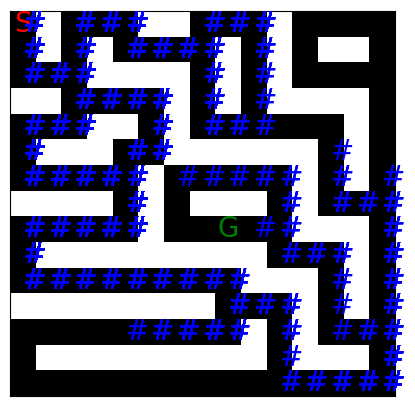

Episode 9:
Learned Path:
(0, 0)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 3)-> (2, 4)-> (1, 4)-> (0, 4)-> (0, 5)-> (0, 4)-> (0, 5)-> (0, 6)-> (1, 6)-> (0, 6)-> (0, 5)-> (0, 4)-> (0, 5)-> (0, 6)-> (0, 5)-> (0, 4)-> (0, 5)-> (0, 6)-> (1, 6)-> (2, 6)-> (3, 6)-> (4, 6)-> (3, 6)-> (2, 6)-> (3, 6)-> (4, 6)-> (3, 6)-> (4, 6)-> (4, 5)-> (4, 6)-> (4, 5)-> (5, 5)-> (5, 4)-> (5, 3)-> (5, 4)-> (5, 3)-> (5, 4)-> (5, 5)-> (5, 4)-> (5, 5)-> (5, 4)-> (5, 3)-> (5, 4)-> (5, 3)-> (4, 3)-> (3, 3)-> (2, 3)-> (2, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (0, 4)-> (0, 5)-> (0, 4)-> (1, 4)-> (2, 4)-> (1, 4)-> (0, 4)-> (0, 5)-> (0, 6)-> (0, 5)-> (0, 6)-> (0, 5)-> (0, 4)-> (1, 4)-> (0, 4)-> (1, 4)-> (2, 4)-> (2, 3)-> (2, 2)-> (2, 3)-> (2, 4)-> (2,

<Figure size 640x480 with 0 Axes>

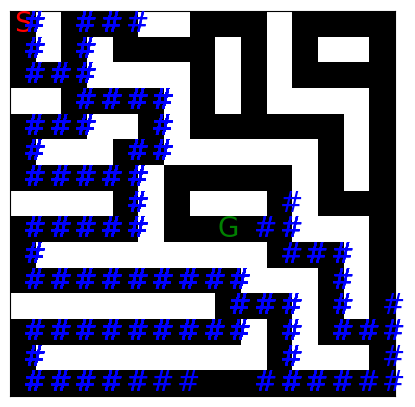

Episode 10:
Learned Path:
(0, 0)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (1, 2)-> (2, 2)-> (1, 2)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (2, 1)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (2, 1)-> (2, 0)-> (2, 1)-> (2, 0)-> (2, 1)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (4, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (2, 0)-> (3, 0)-> (4, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (5, 1)-> (6, 1)-> (7, 1)-> (7, 2)-> (7, 1)-> (7, 0)-> (7, 1)-> (7, 0)-> (8, 0)-> (7, 0)-> (8, 0)-> (7, 0)-> (7, 1)-> (6, 1)-> (7, 1)-> (7, 2)-> (7, 1)-> (7, 2)-> (7, 3)-> (7, 2)-> (7, 1)-> (7, 2)-> (7, 3)-> (7, 2)-> (7, 1)-> (7, 2)-> (7, 3)-> (7, 4)-> (8, 4)-> (9, 4)-> (9, 3)-> (9, 4)-> (8, 4)-> (7

<Figure size 640x480 with 0 Axes>

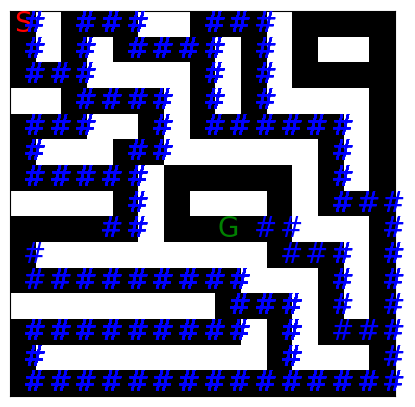


Comparison Results:
Pure Exploitation - Success Rate: 0.00%, Avg Steps: 2.00, Avg Reward: -2.00
Mixed Approach    - Success Rate: 0.00%, Avg Steps: 7515.70, Avg Reward: -38030.00


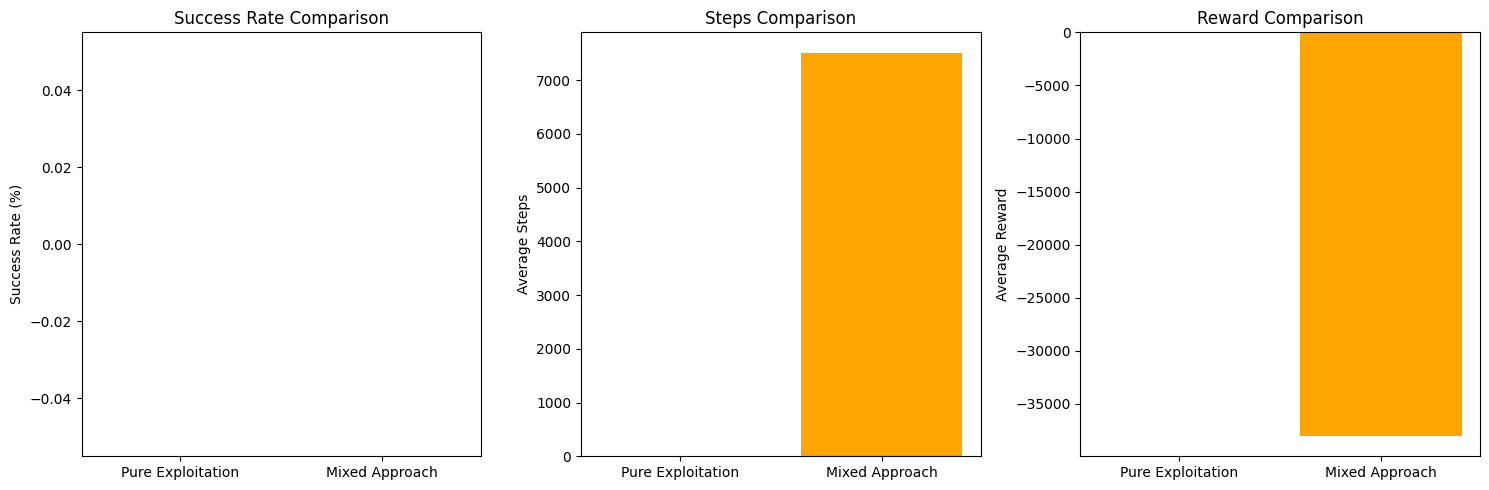

{'exploitation': {'steps': 2.0, 'rewards': -2.0, 'success_rate': 0.0},
 'mixed': {'steps': 7515.7, 'rewards': -38030.0, 'success_rate': 0.0}}

In [29]:
compare_exploration_exploitation(agent, maze, num_episodes=10)

The average reward is: -2752850.0
The average steps is: 5760.6


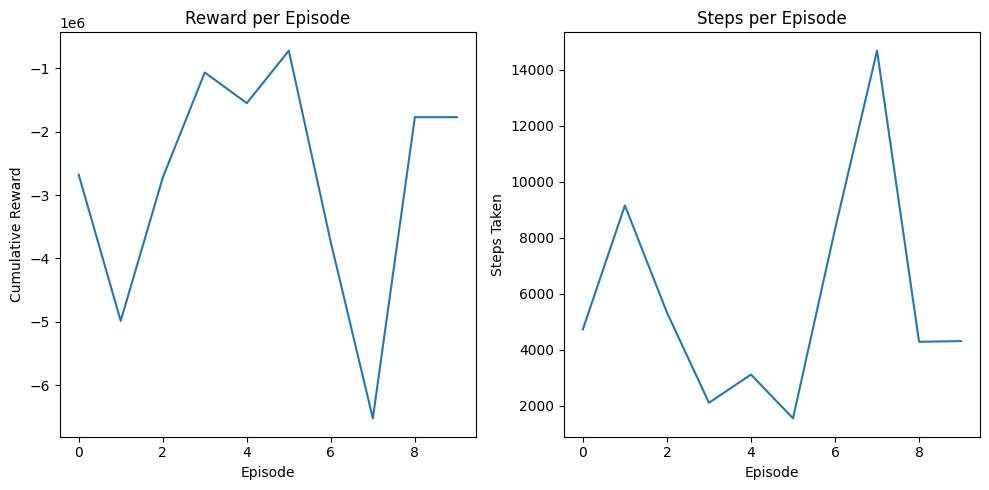

In [30]:
goal_reward = 30
wall_penalty = -100
step_penalty = -1000

agent = QLearningAgent(maze)

train_agent(agent, maze, num_episodes=10)

Learned Path:
(0, 0)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (0, 1)-> (0, 2)-> (1, 2)-> (0, 2)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 0)-> (0, 1)-> (0, 2)-> (1, 2)-> (2, 2)-> (1, 2)-> (2, 2)-> (2, 1)-> (2, 0)-> (2, 1)-> (2, 0)-> (2, 1)-> (2, 0)-> (2, 1)-> (2, 0)-> (3, 0)-> (4, 0)-> (4, 1)-> (5, 1)-> (6, 1)-> (7, 1)-> (7, 0)-> (7, 1)-> (7, 2)-> (7, 1)-> (7, 2)-> (7, 1)-> (7, 0)-> (7, 1)-> (7, 2)-> (7, 1)-> (7, 2)-> (7, 3)-> (7, 2)-> (7, 1)-> (7, 2)-> (7, 1)-> (6, 1)-> (7, 1)-> (7, 0)-> (8, 0)-> (7, 0)-> (8, 0)-> (9, 0)-> (8, 0)-> (7, 0)-> (7, 1)-> (6, 1)-> (7, 1)-> (6, 1)-> (5, 1)-> (6, 1)-> (7, 1)-> (7, 0)-> (8, 0)-> (9, 0)-> (9, 1)-> (9, 0)-> (8, 0)-> (7, 0)-> (7, 1)-> (7, 2)-> (7, 3)-> (7, 4)-> (8, 4)-> (9, 4)-> (8, 4)-> (7, 4)-> (7, 3)-> (7, 4)-> (8, 4)-> (7, 4)-> (7, 3)-> (7, 2)-> (7, 1)-> (6, 1)-> (5, 1)-> (4, 1)-> (4, 0)-> (4, 1)-> (4, 0

<Figure size 640x480 with 0 Axes>

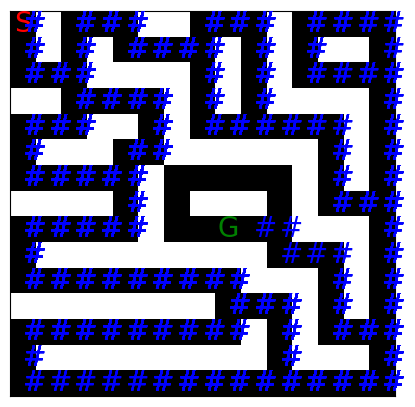

(9127, -5051670)

In [31]:
test_agent(agent, maze)